# Tarea 3: Análisis de Componentes Principales y Reducción de la dimensionalidad

- Nombre: Camila Alvial
- e-mail: camila.alvial@alumnos.uv.cl

- Nombre: Yaneet Reyes
- e-mail: yaneet.reyes@alumnos.uv.cl

- Nombre: Fabian Toloza
- e-mail: fabian.toloza@alumnos.uv.cl
 

La técnica de PCA es muy util para realizar reducción de dimensionalidad de conjuntos de datos altamente dimensionales. Además puede mejorar el desempeño de los clasificadores.

Para el presente estudio deberá utilizar los datos seleccionados en la **Tarea 2**

**Incluir los toolbox que se utilizarán a continuación**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from seaborn import lmplot
from sklearn.decomposition import PCA
from sklearn import datasets
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import cluster
from sklearn.neighbors import kneighbors_graph 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
sns.set()
%matplotlib inline

In [ ]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv("dataR2.csv")
df

Saving dataR2.csv to dataR2.csv


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [ ]:
df2 = df[["Age","BMI","Glucose","Insulin","HOMA","Leptin","Adiponectin","Resistin","MCP.1"]]

In [ ]:
df.groupby('Classification').describe()

Age                        ...     MCP.1                    
               count       mean        std  ...       50%       75%       max
Classification                              ...                              
1               52.0  58.076923  18.957999  ...  471.3225  642.9335  1256.083
2               64.0  56.671875  13.493155  ...  465.3740  737.7625  1698.440

[2 rows x 72 columns]

##1. Estandarizar los datos y separar en conjunto de entrenamiento y test

In [ ]:
from sklearn import datasets
from sklearn.metrics import precision_recall_fscore_support as score

X = df.iloc[:, 0:9].values
y = df.iloc[:,9].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Z = sc.fit(X)

##2. Aplicar como clasificador el SVM con kernel radio basal

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', gamma=0.10, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


#3. Obtener las métricas de desempeño de la clasificación

In [ ]:
from sklearn.metrics import accuracy_score
specificity = tn / (tn + fp)  #(VN/VN+FP)
print('Specificity:', specificity)
precision, recall, fscore,_ = score(y_test, y_pred)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('f-measure: {}'.format(fscore))

Specificity: 0.6875
Accuracy: 0.7143
precision: [0.6875     0.73684211]
recall: [0.6875     0.73684211]
f-measure: [0.6875     0.73684211]


#4. Aplicar PCA y realizar el gráfico de Biplot. Interpretar los resultados obtenidos

In [ ]:
n = len(df.columns)
pca = PCA(n_components = n)
#pca.fit.(df)
pca.fit_transform(df)

array([[-1.18146799e+02, -3.37476713e+01, -5.28153467e-02, ...,
        -2.14712523e+00,  1.16918653e+00,  1.79880348e-01],
       [-6.61260697e+01, -1.03584355e+01, -2.30646641e+01, ...,
        -4.53517516e+00, -2.18689222e-02,  4.78356699e-01],
       [ 1.97681469e+01, -7.54956009e+00, -1.35295269e+01, ...,
         7.58800316e-01, -1.50169087e-01,  4.34688925e-01],
       ...,
       [-2.20636437e+02,  2.10773174e+01,  2.41733144e+01, ...,
         2.59915860e+00, -1.79976957e-01, -6.84250885e-01],
       [-1.42707755e+02, -1.18388329e+01, -1.67101012e+00, ...,
         4.53664528e+00,  2.86699600e-01, -8.26901949e-01],
       [-4.43763394e+02,  7.90052869e+01,  1.76453666e+01, ...,
        -6.62439336e+00, -9.53528198e-01, -1.69338414e-01]])

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[9.88345332e-01 5.20397007e-03 2.45231505e-03 1.95870037e-03
 9.95401598e-04 5.84354113e-04 3.44379860e-04 1.08433224e-04
 5.69743980e-06 1.41583235e-06]


In [ ]:
np.round(pca.explained_variance_ratio_*100)

array([99.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
pca.components_
xvector = pca.components_[0] # Vector de la componente principal 1 
yvector = pca.components_[1] # Vector de la componente principal 2

xvector

array([ 6.41520052e-04,  3.25417927e-03,  1.73255751e-02,  5.09492460e-03,
        2.74181432e-03,  8.09589230e-04, -3.97450515e-03,  1.31477784e-02,
        9.99732971e-01,  1.32684806e-04])

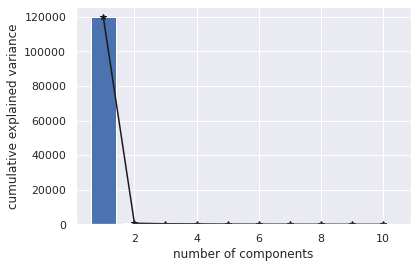

[1.19719267e+05 6.30362143e+02 2.97051395e+02 2.37259351e+02
 1.20574000e+02 7.07834031e+01 4.17150798e+01 1.31346258e+01
 6.90136629e-01 1.71501200e-01]


In [ ]:
# Varianza total explicada (valores propios)
valores_propios = pca.explained_variance_ 
valores_propios

plt.bar(np.arange(1,n+1), valores_propios, width=0.8, align = 'center' )
plt.plot(np.arange(1,n+1), valores_propios,'-*k')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
print(valores_propios)

In [ ]:
W = pca.transform(df)
xs = W[:,0]
ys = W[:,1]
xvector = pca.components_[0]
yvector = pca.components_[1]


array([-0.34911523,  0.14540018, -0.46011376, -0.01287123, -0.02723819,
        0.79025416,  0.00085951,  0.14071962,  0.00537847, -0.00563593])

Grafico Bi-plot

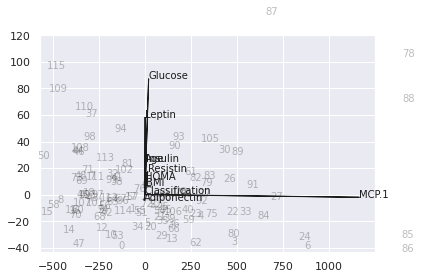

In [ ]:
features = df.columns.values
for i in range(len(xvector)):
    plt.arrow(0,0,xvector[i]*max(xs), yvector[i]*max(ys), color = 'k', width = 0.005, head_width = 0.1)
    plt.text(xvector[i]*max(xs),yvector[i]*max(ys), list(features)[i], color = 'k')
colores = 'gby'
for i in range(len(xs)):
  plt.plot(xs[i], ys[i], alpha = 0.5)
  plt.text(xs[i]*1.2, ys[i]*1.2, list(df.index)[i], alpha = 0.3)
  

In [ ]:
pca
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[9.88345332e-01 5.20397007e-03 2.45231505e-03 1.95870037e-03
 9.95401598e-04 5.84354113e-04 3.44379860e-04 1.08433224e-04
 5.69743980e-06 1.41583235e-06]


Del gráfico biplot se puede apreciar que para la primera componente principal P1, la variable que tiene mayor predominancia es la MCP-1, y para la segunda componente P2, es la glucosa. Por lo tanto estas son las varibales que mejor explican la variacion en las dos primeras componentes principales.

#5. Realizar el gráfico Scree-plot relativo a la contribución a la varianza de cada componente.

Grafico Scree plot

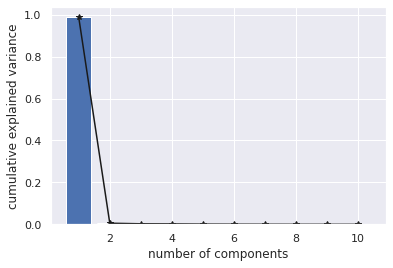

[9.88345332e-01 5.20397007e-03 2.45231505e-03 1.95870037e-03
 9.95401598e-04 5.84354113e-04 3.44379860e-04 1.08433224e-04
 5.69743980e-06 1.41583235e-06]


In [ ]:
# Varianza proporcional explicada
var_ratio = pca.explained_variance_ratio_
plt.bar(np.arange(1,n+1), var_ratio, width=0.8, align = 'center' )
plt.plot(np.arange(1,n+1), var_ratio,'-*k')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
print(var_ratio)

#6. Seleccionar las caracteristicas que justifican el 70\% de la varianza

In [ ]:
## MCP1 y Insulinda tienen mayor peso en cada las componentes.
x = df.iloc[:,8:9].values     ## seleccionar caracteristicas
Y = df.iloc[:,3:4].values   



#7. Aplicar como clasificador el SVM con kernel radio basal a las características seleccionadas y obtener la métricas de desempeño. Concluir

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [ ]:
from sklearn.svm import SVC       
####### 
svc = SVC(kernel = 'rbf', gamma=0.10, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
### metricas de desempeño
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)  #(VN/VN+FP)
print('Specificity:', specificity)
precision, recall, fscore,_ = score(y_test, y_pred)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('f-measure: {}'.format(fscore))

Specificity: 0.6875
Accuracy: 0.7143
precision: [0.6875     0.73684211]
recall: [0.6875     0.73684211]
f-measure: [0.6875     0.73684211]


In [ ]:
# con PCA 
pca = PCA()
pca2 = pca.fit(X_train_std)
X_train = pca2.transform(X_train_std)
X_test = pca2.transform(X_test_std)

In [ ]:
var_ratio

array([0.30990019, 0.17515809, 0.15453831, 0.11793318, 0.08956134,
       0.06478885, 0.05180945, 0.03265207, 0.00365853])

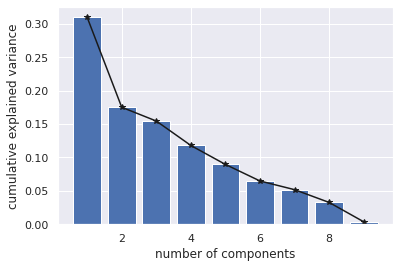

[0.30990019 0.17515809 0.15453831 0.11793318 0.08956134 0.06478885
 0.05180945 0.03265207 0.00365853]


In [ ]:
var_ratio = pca2.explained_variance_ratio_
plt.bar(np.arange(1,n), var_ratio, width=0.8, align = 'center' )
plt.plot(np.arange(1,n), var_ratio,'-*k')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
print(var_ratio)

In [ ]:
np.sum(pca2.explained_variance_ratio_[:5])  #Varianza explicada por las primeras 5 componentes

0.8470911063007708

In [ ]:
# con PCA 
pca = PCA(n_components=7)
pca2 = pca.fit(X_train_std)
X_train = pca2.transform(X_train_std)
X_test = pca2.transform(X_test_std)

In [ ]:
from sklearn.svm import SVC       
####### 
svc = SVC(kernel = 'rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
### metricas de desempeño
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)  #(VN/VN+FP)
print('Specificity:', specificity)
precision, recall, fscore,_ = score(y_test, y_pred)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('f-measure: {}'.format(fscore))


Specificity: 0.625
Accuracy: 0.5429
precision: [0.5 0.6]
recall: [0.625      0.47368421]
f-measure: [0.55555556 0.52941176]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.62      0.56        16
           2       0.60      0.47      0.53        19

    accuracy                           0.54        35
   macro avg       0.55      0.55      0.54        35
weighted avg       0.55      0.54      0.54        35



In [ ]:
#Con componentes principales
X2 = df[['Glucose', 'MCP.1',]].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, 
                test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.svm import SVC       
####### 
svc = SVC(kernel = 'rbf', gamma=0.10, C=10.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
### metricas de desempeño
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)  #(VN/VN+FP)
print('Specificity:', specificity)
precision, recall, fscore,_ = score(y_test, y_pred)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('f-measure: {}'.format(fscore))

Specificity: 0.0625
Accuracy: 0.5714
precision: [1.         0.55882353]
recall: [0.0625 1.    ]
f-measure: [0.11764706 0.71698113]


#8. Realizar un estudio comparativo del desempeño de **las técnicas de clustering** con las dos primeras componentes principales. Utilizar las siguientes técnicas de clustering: K-Means, Single-Linkage, Ward, DBSCAN. Obtener los indicadores de desempeño más relevantes. Graficar y Concluir

k-means

In [ ]:
algoritmo = cluster.KMeans(n_clusters=3)
t0 = time.time()
algoritmo.fit(X)
t1 = time.time()
tiempo_ajuste = t1 - t0
print("Tiempo de Ajuste:", tiempo_ajuste)

Tiempo de Ajuste: 0.03159642219543457


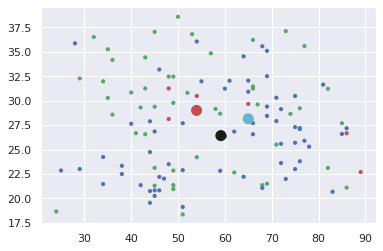

In [ ]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
y_pred = algoritmo.labels_.astype(np.int)
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
centros = algoritmo.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], s=100, c=['k','r','c'])

In [ ]:
labels = y_pred
labels_true = y
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.6f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.6f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.6f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity: 0.002201
Completeness: 0.001775
V-measure: 0.001965
Adjusted Rand Index: -0.010903
Adjusted Mutual Information: -0.010126
Silhouette Coefficient: 0.588406


Single-Linkage

In [ ]:
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
algoritmo = cluster.AgglomerativeClustering(n_clusters=3, linkage='single',
                                           connectivity=connectivity)
t0 = time.time()
algoritmo.fit(X)
t1 = time.time()
tiempo_ajuste = t1 - t0
print("Tiempo de Ajuste:", tiempo_ajuste)

Tiempo de Ajuste: 0.007742643356323242


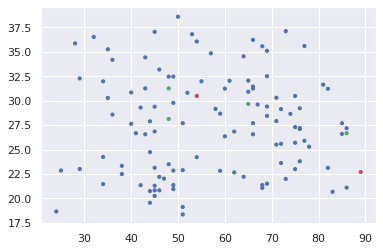

In [ ]:
y_pred = algoritmo.labels_.astype(np.int)
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

In [ ]:
labels = algoritmo.labels_
labels_true = y
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.6f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.6f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.6f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity: 0.050039
Completeness: 0.145532
V-measure: 0.074472
Adjusted Rand Index: -0.003183
Adjusted Mutual Information: 0.051450
Silhouette Coefficient: 0.549791


Ward

In [ ]:
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)
algoritmo = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward',
                                           connectivity=connectivity)
t0 = time.time()
algoritmo.fit(X)
t1 = time.time()
tiempo_ajuste = t1 - t0
print("Tiempo de Ajuste:", tiempo_ajuste)

Tiempo de Ajuste: 0.01282644271850586


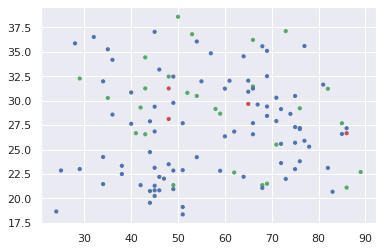

In [ ]:
y_pred = algoritmo.labels_.astype(np.int)
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

In [ ]:
labels = y_pred
labels_true = y
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.6f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.6f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.6f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity: 0.030895
Completeness: 0.031100
V-measure: 0.030997
Adjusted Rand Index: -0.012371
Adjusted Mutual Information: 0.017167
Silhouette Coefficient: 0.552546


DBSCAN

In [ ]:
algoritmo = cluster.DBSCAN(eps=.1)

t0 = time.time()
algoritmo.fit(X)
t1 = time.time()
tiempo_ajuste = t1 - t0
print("Tiempo de Ajuste:", tiempo_ajuste)

Tiempo de Ajuste: 0.0038194656372070312


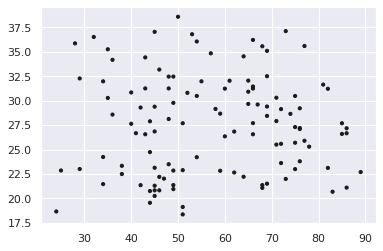

In [ ]:
y_pred = algoritmo.labels_.astype(np.int)
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

In [ ]:
labels = algoritmo.labels_
labels_true = y
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.6f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.6f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
##print("Silhouette Coefficient: %0.6f"
#      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 0
Homogeneity: -0.000000
Completeness: 1.000000
V-measure: -0.000000
Adjusted Rand Index: 0.000000
Adjusted Mutual Information: -0.000000


**9. Features mas importantes usando Random Forest**

In [ ]:
from sklearn import datasets
from sklearn.metrics import precision_recall_fscore_support as score

X = df.iloc[:, 0:9].values
y = df.iloc[:,9].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                test_size=0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
bosque = RandomForestClassifier(criterion = 'gini', 
                                 n_estimators=25, n_jobs=2)
bosque.fit(X_train_std, y_train)
y_pred = bosque.predict(X_test_std)
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)  #(VN/VN+FP)
print('Specificity:', specificity)
precision, recall, fscore, _ = score(y_test, y_pred)
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('f-measure: {}'.format(fscore))

Specificity: 0.5
Accuracy: 0.6571
precision: [0.66666667 0.65217391]
recall: [0.5        0.78947368]
f-measure: [0.57142857 0.71428571]
